# Variable Selection for HEADSS: Complete Cases Only

In this notebook we take HEADSS data and run Lasso for variable selection. We examine the longitudinal scenario.

## Load necessary packages

In [ ]:
# Install required packages
install.packages("glmnet")
install.packages("glmmLasso")
install.packages("ROSE")
install.packages("pROC")
install.packages("reshape2")
installed.packages("rpr")
install.packages(
   "ggplot2",
   repos = c("http://rstudio.org/_packages",
   "http://cran.rstudio.com")
)
install.packages("lme4")

# Load required packages
library(grid)
library(glmmLasso)
library(glmnet)
library(ROSE)
library(pROC)
library(dplyr)
require(reshape2)
require(rpr)
library(MASS)
library(nlme)
library(lme4)
library(ggplot2)

## Load Data

In [ ]:
id <- "fileID" # google file ID
df_org <- read.csv(sprintf("https://docs.google.com/uc?id=%s&export=download", id))

# complete cases
id_comp <- "fileID" # google file ID
df_comp <- read.csv(sprintf("https://docs.google.com/uc?id=%s&export=download", id_comp))


In [ ]:
summary(df_comp)

       ID          Timepoint      AgeT         OldYoungT        BoyGirlT     
 Min.   :   10   Min.   :1   Min.   :10.00   Min.   :0.000   Min.   :0.0000  
 1st Qu.: 6070   1st Qu.:1   1st Qu.:13.00   1st Qu.:0.000   1st Qu.:0.0000  
 Median :11470   Median :2   Median :15.00   Median :1.000   Median :1.0000  
 Mean   :11588   Mean   :2   Mean   :14.96   Mean   :0.527   Mean   :0.5509  
 3rd Qu.:17130   3rd Qu.:3   3rd Qu.:17.00   3rd Qu.:1.000   3rd Qu.:1.0000  
 Max.   :56080   Max.   :3   Max.   :23.00   Max.   :1.000   Max.   :1.0000  
 ADHDThinkBeforeDoT  APQMonHighT     APQPosParentHighT AbusePhysOrEmoYearT
 Min.   :0.0000     Min.   :0.0000   Min.   :0.000     Min.   :0.0000     
 1st Qu.:1.0000     1st Qu.:0.0000   1st Qu.:0.000     1st Qu.:0.0000     
 Median :1.0000     Median :0.0000   Median :0.000     Median :0.0000     
 Mean   :0.9553     Mean   :0.3487   Mean   :0.358     Mean   :0.2822     
 3rd Qu.:1.0000     3rd Qu.:1.0000   3rd Qu.:1.000     3rd Qu.:1.0000     
 Max

In [ ]:
head(df_comp)

,ID,Timepoint,AgeT,OldYoungT,BoyGirlT,ADHDThinkBeforeDoT,APQMonHighT,APQPosParentHighT,AbusePhysOrEmoYearT,AdhLastWeekNewT,⋯,AnyDepSympT,SuicidalityAnyT,SubstanceUseT,EnrSchOrGradT,OverWeekMissedT,BullyBinT,OrAnVagSexT,CondomNotAlwaysT,MultiplePartnersYearT,SexViolT
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,10,1,13,0,0,1,0,1,0,0,⋯,1,0,0,1,1,1,0,0,0,0
2,10,2,14,0,0,1,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
3,10,3,15,1,0,1,0,0,0,1,⋯,1,0,1,1,0,0,1,0,0,0
4,20,1,13,0,1,1,0,1,0,1,⋯,0,0,0,1,0,0,0,0,0,0
5,20,2,15,1,1,1,0,0,0,0,⋯,0,0,0,0,0,0,1,1,1,0
6,20,3,16,1,1,1,0,0,0,0,⋯,1,0,0,0,0,1,1,1,0,0


# Fit full model

In [ ]:
family = binomial(link = 'logit')

In [ ]:
full_model<-glmmPQL(AdhLastWeekNewT ~ AgeT
                                    + Timepoint 
                                    + BoyGirlT
                                    + OldYoungT
                                    + ADHDThinkBeforeDoT 
                                    + APQMonHighT 
                                    + APQPosParentHighT 
                                    + AbusePhysOrEmoYearT 
                                    + CBCLAngryT 
                                    + CBCLCutclassT
                                    + CBCLRunAwayT 
                                    + CGWhoBioParentT 
                                    + CVAnyT 
                                    + DVOrDConflictT 
                                    + FPEverT 
                                    + PTSDAnnoyedT 
                                    + PregnancyAnyT 
                                    + RelationshipT 
                                    + SchExpTeacherHitT 
                                    + SchGradeRepeatAnyT
                                    + SexPartner5YearsT 
                                    + SexTransactAnyT 
                                    + SocInvNoneT 
                                    + SymSTIAny1T 
                                    + SleepIssuesT
                                    + AnyDepSympT 
                                    + SuicidalityAnyT 
                                    + SubstanceUseT 
                                    + EnrSchOrGradT 
                                    + OverWeekMissedT
                                    + BullyBinT 
                                    + OrAnVagSexT 
                                    + CondomNotAlwaysT 
                                    + MultiplePartnersYearT 
                                    + SexViolT,
              random = ~1|ID,family=family,data=df_comp)

summary(full_model)

iteration 1

iteration 2

iteration 3

iteration 4

iteration 5



Linear mixed-effects model fit by maximum likelihood
  Data: df_comp 
  AIC BIC logLik
   NA  NA     NA

Random effects:
 Formula: ~1 | ID
        (Intercept)  Residual
StdDev:    0.882932 0.8968713

Variance function:
 Structure: fixed weights
 Formula: ~invwt 
Fixed effects:  AdhLastWeekNewT ~ AgeT + Timepoint + BoyGirlT + OldYoungT + ADHDThinkBeforeDoT +      APQMonHighT + APQPosParentHighT + AbusePhysOrEmoYearT + CBCLAngryT +      CBCLCutclassT + CBCLRunAwayT + CGWhoBioParentT + CVAnyT +      DVOrDConflictT + FPEverT + PTSDAnnoyedT + PregnancyAnyT +      RelationshipT + SchExpTeacherHitT + SchGradeRepeatAnyT +      SexPartner5YearsT + SexTransactAnyT + SocInvNoneT + SymSTIAny1T +      SleepIssuesT + AnyDepSympT + SuicidalityAnyT + SubstanceUseT +      EnrSchOrGradT + OverWeekMissedT + BullyBinT + OrAnVagSexT +      CondomNotAlwaysT + MultiplePartnersYearT + SexViolT 
                           Value Std.Error   DF   t-value p-value
(Intercept)            1.7091163 0.5146773 1832  3

## Mixed-Effect GLM Lasso

In [ ]:
options(warn=-1)
lasso_model <- function(df){
  glm_lasso <- glmmLasso(AdhLastWeekNewT~AgeT
                                    + Timepoint 
                                    + BoyGirlT
                                    + OldYoungT
                                    + ADHDThinkBeforeDoT 
                                    + APQMonHighT 
                                    + APQPosParentHighT 
                                    + AbusePhysOrEmoYearT 
                                    + CBCLAngryT 
                                    + CBCLCutclassT
                                    + CBCLRunAwayT 
                                    + CGWhoBioParentT 
                                    + CVAnyT 
                                    + DVOrDConflictT 
                                    + FPEverT 
                                    + PTSDAnnoyedT 
                                    + PregnancyAnyT 
                                    + RelationshipT 
                                    + SchExpTeacherHitT 
                                    + SchGradeRepeatAnyT
                                    + SexPartner5YearsT 
                                    + SexTransactAnyT 
                                    + SocInvNoneT 
                                    + SymSTIAny1T 
                                    + SleepIssuesT
                                    + AnyDepSympT 
                                    + SuicidalityAnyT 
                                    + SubstanceUseT 
                                    + EnrSchOrGradT 
                                    + OverWeekMissedT
                                    + BullyBinT 
                                    + OrAnVagSexT 
                                    + CondomNotAlwaysT 
                                    + MultiplePartnersYearT 
                                    + SexViolT,
                                    rnd = list(ID=~1),  
                                    family = family, data = df, lambda=140, switch.NR=T,final.re=T,
                                    control=list())
  coef <- glm_lasso$coefficients
  coef <- coef[coef != 0]
  return(coef)
}


____
### Remark.

Running `glmmLasso()` always causes this warning to appear:


```
Warning message in if (class(InvFisher2) == "try-error") InvFisher2 <- try(solve(F_gross), :
“the condition has length > 1 and only the first element will be used”
```




Other people seem to be getting this too. I saw (unresolved) discussions about it on a private blog post; a StackOverflow question; and a comment on Reddit. Thankfully, it seems to be some obscure under-the-hood thing about character vector type matching, rather than something that might systematically change the numbers we get.
___

# Complete Cases Model

In [ ]:
# function that returns lasso coefficients for a given 
# lambda (lambda) and dataframe (df)
options(warn=-1)
lasso_coef <- function(lambda = lambda, df = df){
  glm_lasso <- glmmLasso(AdhLastWeekNewT ~ AgeT
                                    + Timepoint 
                                    + BoyGirlT
                                    + OldYoungT
                                    + ADHDThinkBeforeDoT 
                                    + APQMonHighT 
                                    + APQPosParentHighT 
                                    + AbusePhysOrEmoYearT 
                                    + CBCLAngryT 
                                    + CBCLCutclassT
                                    + CBCLRunAwayT 
                                    + CGWhoBioParentT 
                                    + CVAnyT 
                                    + DVOrDConflictT 
                                    + FPEverT 
                                    + PTSDAnnoyedT 
                                    + PregnancyAnyT 
                                    + RelationshipT 
                                    + SchExpTeacherHitT 
                                    + SchGradeRepeatAnyT
                                    + SexPartner5YearsT 
                                    + SexTransactAnyT 
                                    + SocInvNoneT 
                                    + SymSTIAny1T 
                                    + SleepIssuesT
                                    + AnyDepSympT 
                                    + SuicidalityAnyT 
                                    + SubstanceUseT 
                                    + EnrSchOrGradT 
                                    + OverWeekMissedT
                                    + BullyBinT 
                                    + OrAnVagSexT 
                                    + CondomNotAlwaysT 
                                    + MultiplePartnersYearT 
                                    + SexViolT,
                                    rnd = list(ID=~1),  
                                    family = family, data = df, lambda = lambda, switch.NR=T,final.re=T,
                                    control=list())
  return(glm_lasso$coefficients)
}


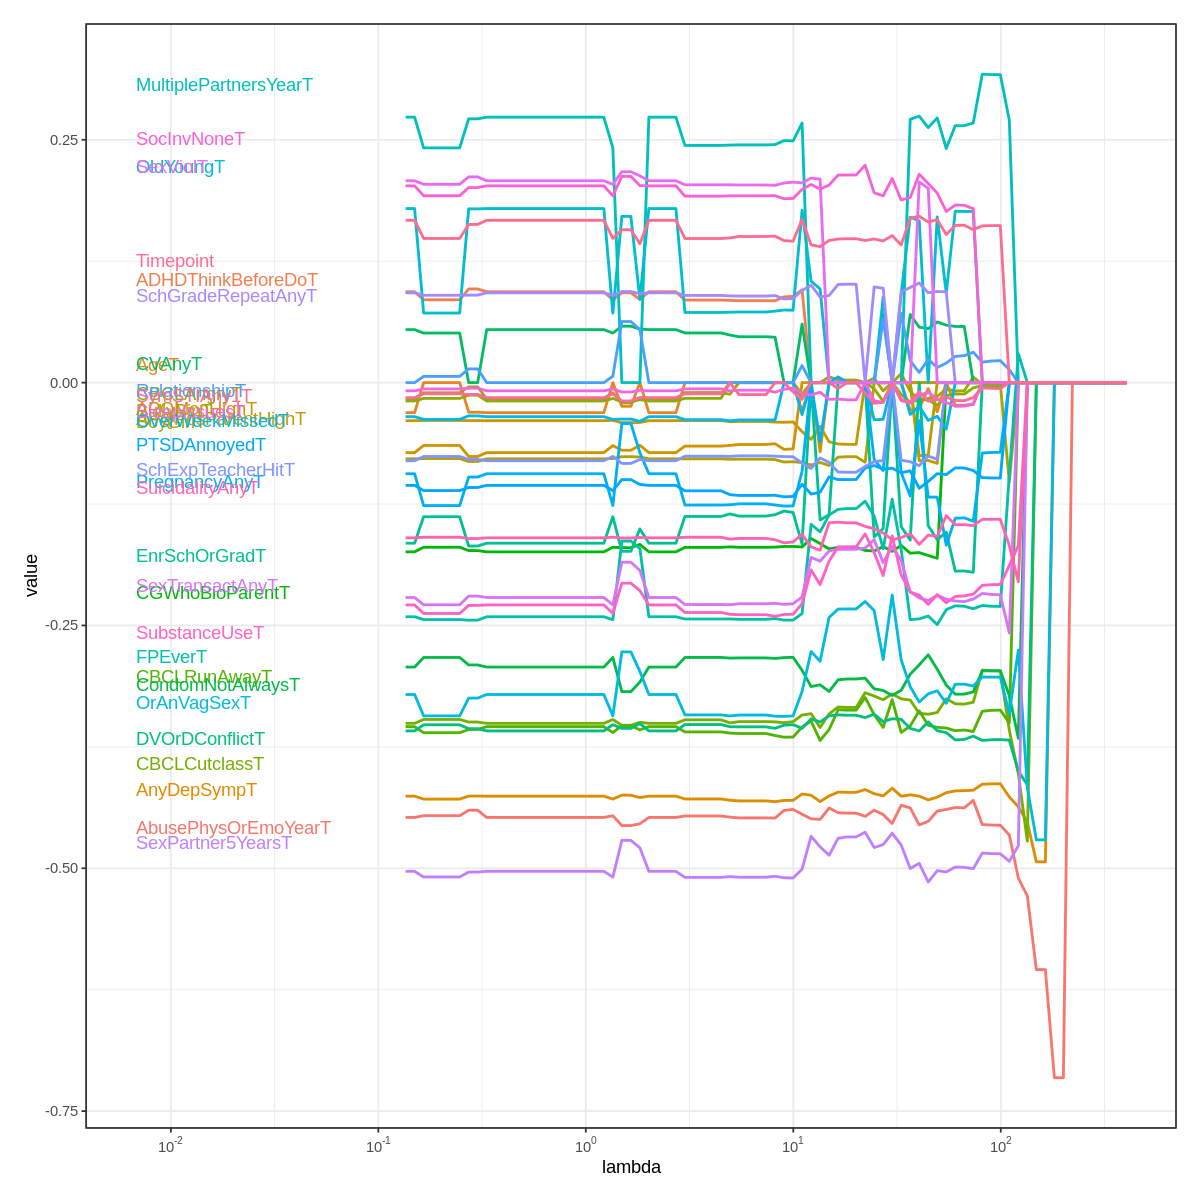

In [ ]:
# for sequence of lambdas compute lasso coefficients
options(warn=-1)
lambdas <- rev(exp(seq(-2,6,by=0.1)))
coefs <- array(numeric(),c(0))
coefs_table = data.frame(lasso_coef(lambda = lambdas[1], df = df_comp))
coefs_table <- tibble::rownames_to_column(coefs_table, "Var.Name")

for (i in c(2:length(lambdas))){
  coef <- lasso_coef(lambda = lambdas[i], df = df_comp)
  temp_df <- data.frame(coef)
  temp_df <- tibble::rownames_to_column(temp_df, "Var.Name") 
  coefs_table <- merge(coefs_table, temp_df, by="Var.Name", all=TRUE)
}
coefs_table[is.na(coefs_table)]<-0

# melt the data
tdf <- t(coefs_table)
colnames(tdf) <- tdf[1,]
tdf <- tdf[-1, ] 
rownames(tdf) <- c()

tdf <- cbind(tdf, lambda = lambdas)
tdf <- data.frame(tdf[,-1])
tdf <- sapply(tdf, as.numeric )
tdf <- data.frame(tdf)
tdf_melt <- melt(tdf ,  id.vars = 'lambda', variable.name = 'series')

# plot the data
options(repr.plot.width=10, repr.plot.height=10)
p1 = ggplot(tdf_melt) + 
  geom_line(aes(x = lambda, y = value, colour = series), size=0.8)+#, vjust = "inward", hjust = "inward") +
  scale_x_log10(breaks = scales::trans_breaks("log10", function(x) 10^x),labels = scales::trans_format("log10", scales::math_format(10^.x))) +
  geom_text(data = subset(tdf_melt, lambda < (min(lambdas)+0.00001)), aes(label = series, colour = series, x = min(lambdas)*0.05, y = value), hjust = -0.3*0, vjust = 0.0, position=position_jitter(width=0.0,height=0.05)) +
  scale_colour_discrete(guide = 'none')  +  
  theme_bw() +  
  theme(plot.margin = unit(c(1,1,1,1), "lines"))

# Code to turn off clipping
gt <- ggplotGrob(p1)
gt$layout$clip[gt$layout$name == "panel"] <- "off"
grid.draw(gt)

____

In [ ]:
# fit lasso regression for lambda such that only 3 varaibles are selected
options(warn=-1)
glm_lasso <- glmmLasso(AdhLastWeekNewT~AgeT
                                    + Timepoint 
                                    + BoyGirlT
                                    + OldYoungT
                                    + ADHDThinkBeforeDoT 
                                    + APQMonHighT 
                                    + APQPosParentHighT 
                                    + AbusePhysOrEmoYearT 
                                    + CBCLAngryT 
                                    + CBCLCutclassT
                                    + CBCLRunAwayT 
                                    + CGWhoBioParentT 
                                    + CVAnyT 
                                    + DVOrDConflictT 
                                    + FPEverT 
                                    + PTSDAnnoyedT 
                                    + PregnancyAnyT 
                                    + RelationshipT 
                                    + SchExpTeacherHitT 
                                    + SchGradeRepeatAnyT
                                    + SexPartner5YearsT 
                                    + SexTransactAnyT 
                                    + SocInvNoneT 
                                    + SymSTIAny1T 
                                    + SleepIssuesT
                                    + AnyDepSympT 
                                    + SuicidalityAnyT 
                                    + SubstanceUseT 
                                    + EnrSchOrGradT 
                                    + OverWeekMissedT
                                    + BullyBinT 
                                    + OrAnVagSexT 
                                    + CondomNotAlwaysT 
                                    + MultiplePartnersYearT 
                                    + SexViolT,
                                    rnd = list(ID=~1),  
                                    family = family, data = df_comp, lambda = 155, switch.NR=T,final.re=T,
                                    control=list())

In [ ]:
summary(glm_lasso)

Call:
glmmLasso(fix = AdhLastWeekNewT ~ AgeT + Timepoint + BoyGirlT + 
    OldYoungT + ADHDThinkBeforeDoT + APQMonHighT + APQPosParentHighT + 
    AbusePhysOrEmoYearT + CBCLAngryT + CBCLCutclassT + CBCLRunAwayT + 
    CGWhoBioParentT + CVAnyT + DVOrDConflictT + FPEverT + PTSDAnnoyedT + 
    PregnancyAnyT + RelationshipT + SchExpTeacherHitT + SchGradeRepeatAnyT + 
    SexPartner5YearsT + SexTransactAnyT + SocInvNoneT + SymSTIAny1T + 
    SleepIssuesT + AnyDepSympT + SuicidalityAnyT + SubstanceUseT + 
    EnrSchOrGradT + OverWeekMissedT + BullyBinT + OrAnVagSexT + 
    CondomNotAlwaysT + MultiplePartnersYearT + SexViolT, rnd = list(ID = ~1), 
    data = df_comp, lambda = 155, family = family, switch.NR = T, 
    final.re = T, control = list())


Fixed Effects:

Coefficients:
                       Estimate    StdErr z.value   p.value    
(Intercept)            1.352738  0.043742 30.9250 < 2.2e-16 ***
AgeT                   0.000000        NA      NA        NA    
Timepoint              0

## Plot ROCs of the full and Lasso model

Lasso model with 3 variables


Setting levels: control = 0, case = 1

Warning message in roc.default(response, predictors[, 1], ...):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases



Full GLM


Setting levels: control = 0, case = 1

Setting direction: controls < cases



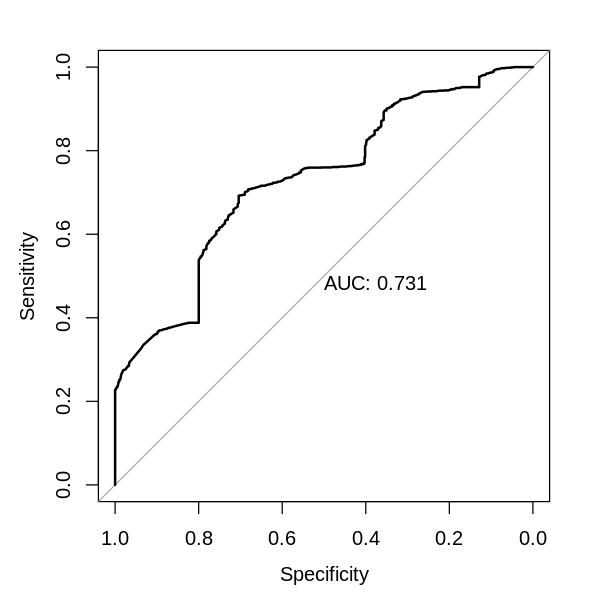

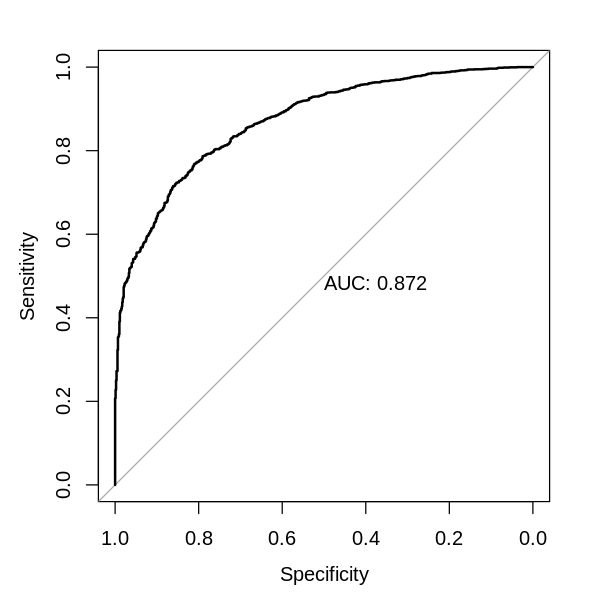

In [ ]:
options(repr.plot.width=5, repr.plot.height=5)
prob_lasso <- predict(glm_lasso, type=c("response"),)
prob_full <- predict(full_model, type=c("response"),)

cat("Lasso model with 3 variables\n")
g_lasso <- roc(df_comp$AdhLastWeekNewT ~ prob_lasso, plot = TRUE, print.auc = TRUE)
cat("Full GLM\n")
g_full <- roc(df_comp$AdhLastWeekNewT ~ prob_full, plot = TRUE, print.auc = TRUE)

___

Setting levels: control = 0, case = 1

Warning message in roc.default(df_comp$AdhLastWeekNewT, prob_lasso):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”
Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



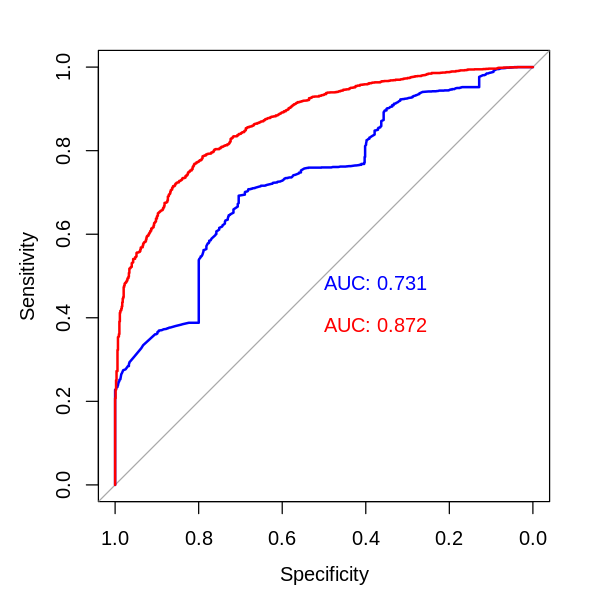

In [ ]:
library(pROC)
roc_rose <- plot(roc(df_comp$AdhLastWeekNewT, prob_lasso), print.auc = TRUE, col = "blue")
roc_rose <- plot(roc(df_comp$AdhLastWeekNewT, prob_full), print.auc = TRUE, 
                 col = "red", print.auc.y = .4, add = TRUE)

## Sensitivity Check
### GLMnet Model: Coross-Sectional Case

Note that `glmnet` accepts only matrices as covariates.

In [ ]:
x_ <- within(df_comp, rm(ID,Timepoint,AdhLastWeekNewT))
y <- df_comp$AdhLastWeekNewT
x <- as.matrix(sapply(x_, as.numeric))

Fit the model for 200 different lambdas in decreasing order.

In [ ]:
fit <- glmnet(x, y, family = "binomial", alpha = 1, nlambda = 200)

In [ ]:
print(fit)


Call:  glmnet(x = x, y = y, family = "binomial", alpha = 1, nlambda = 200) 

   Df %Dev   Lambda
1   0 0.00 0.072160
2   1 0.17 0.068900
3   1 0.33 0.065780
4   2 0.54 0.062810
5   2 0.76 0.059960
6   3 1.02 0.057250
7   3 1.28 0.054660
8   3 1.51 0.052190
9   3 1.72 0.049830
10  3 1.92 0.047580
11  3 2.10 0.045420
12  4 2.27 0.043370
13  5 2.47 0.041410
14  6 2.65 0.039540
15  6 2.84 0.037750
16  7 3.02 0.036040
17  7 3.19 0.034410
18  7 3.35 0.032850
19  7 3.49 0.031370
20  7 3.62 0.029950
21  7 3.73 0.028590
22  8 3.84 0.027300
23  9 3.95 0.026070
24 11 4.05 0.024890
25 11 4.14 0.023760
26 11 4.22 0.022690
27 11 4.30 0.021660
28 11 4.37 0.020680
29 11 4.44 0.019750
30 11 4.50 0.018850
31 12 4.56 0.018000
32 13 4.62 0.017190
33 14 4.69 0.016410
34 14 4.75 0.015670
35 14 4.81 0.014960
36 15 4.87 0.014280
37 15 4.92 0.013640
38 15 4.97 0.013020
39 15 5.01 0.012430
40 15 5.05 0.011870
41 15 5.08 0.011330
42 15 5.12 0.010820
43 16 5.15 0.010330
44 16 5.17 0.009862
45 16 5.20 0.009416
46

Get the best lambda by the means of cross-validation.

In [ ]:
cvfit <- cv.glmnet(x, y, family = "binomial", type.measure = "class")
# Only 3 variables
sl = 0.045420
coef(cvfit, s = sl)
y_predicted = predict(cvfit, newx = x, type = "class", s = sl)

35 x 1 sparse Matrix of class "dgCMatrix"
                              s1
(Intercept)            0.9480828
AgeT                   .        
OldYoungT              .        
BoyGirlT               .        
ADHDThinkBeforeDoT     .        
APQMonHighT            .        
APQPosParentHighT      .        
AbusePhysOrEmoYearT   -0.2353457
CBCLAngryT             .        
CBCLCutclassT          .        
CBCLRunAwayT           .        
CGWhoBioParentT        .        
CVAnyT                 .        
DVOrDConflictT         .        
FPEverT                .        
PTSDAnnoyedT           .        
PregnancyAnyT          .        
RelationshipT          .        
SchExpTeacherHitT      .        
SchGradeRepeatAnyT     .        
SexPartner5YearsT      .        
SexTransactAnyT        .        
SocInvNoneT            .        
SymSTIAny1T            .        
SleepIssuesT           .        
AnyDepSympT           -0.1496928
SuicidalityAnyT        .        
SubstanceUseT          .        
E

In [ ]:
# Best Cross-Validation Model
coef(cvfit, s = "lambda.min")

35 x 1 sparse Matrix of class "dgCMatrix"
                               s1
(Intercept)            1.25960934
AgeT                   .         
OldYoungT              .         
BoyGirlT               .         
ADHDThinkBeforeDoT     .         
APQMonHighT            .         
APQPosParentHighT      .         
AbusePhysOrEmoYearT   -0.41603123
CBCLAngryT             .         
CBCLCutclassT         -0.26785050
CBCLRunAwayT          -0.18658398
CGWhoBioParentT       -0.05294802
CVAnyT                 .         
DVOrDConflictT        -0.26738554
FPEverT                .         
PTSDAnnoyedT          -0.01731580
PregnancyAnyT          .         
RelationshipT          .         
SchExpTeacherHitT      .         
SchGradeRepeatAnyT     .         
SexPartner5YearsT     -0.31377177
SexTransactAnyT       -0.10077641
SocInvNoneT            0.05772805
SymSTIAny1T            .         
SleepIssuesT           .         
AnyDepSympT           -0.35581522
SuicidalityAnyT       -0.08656794
Substa

### Plot Fit

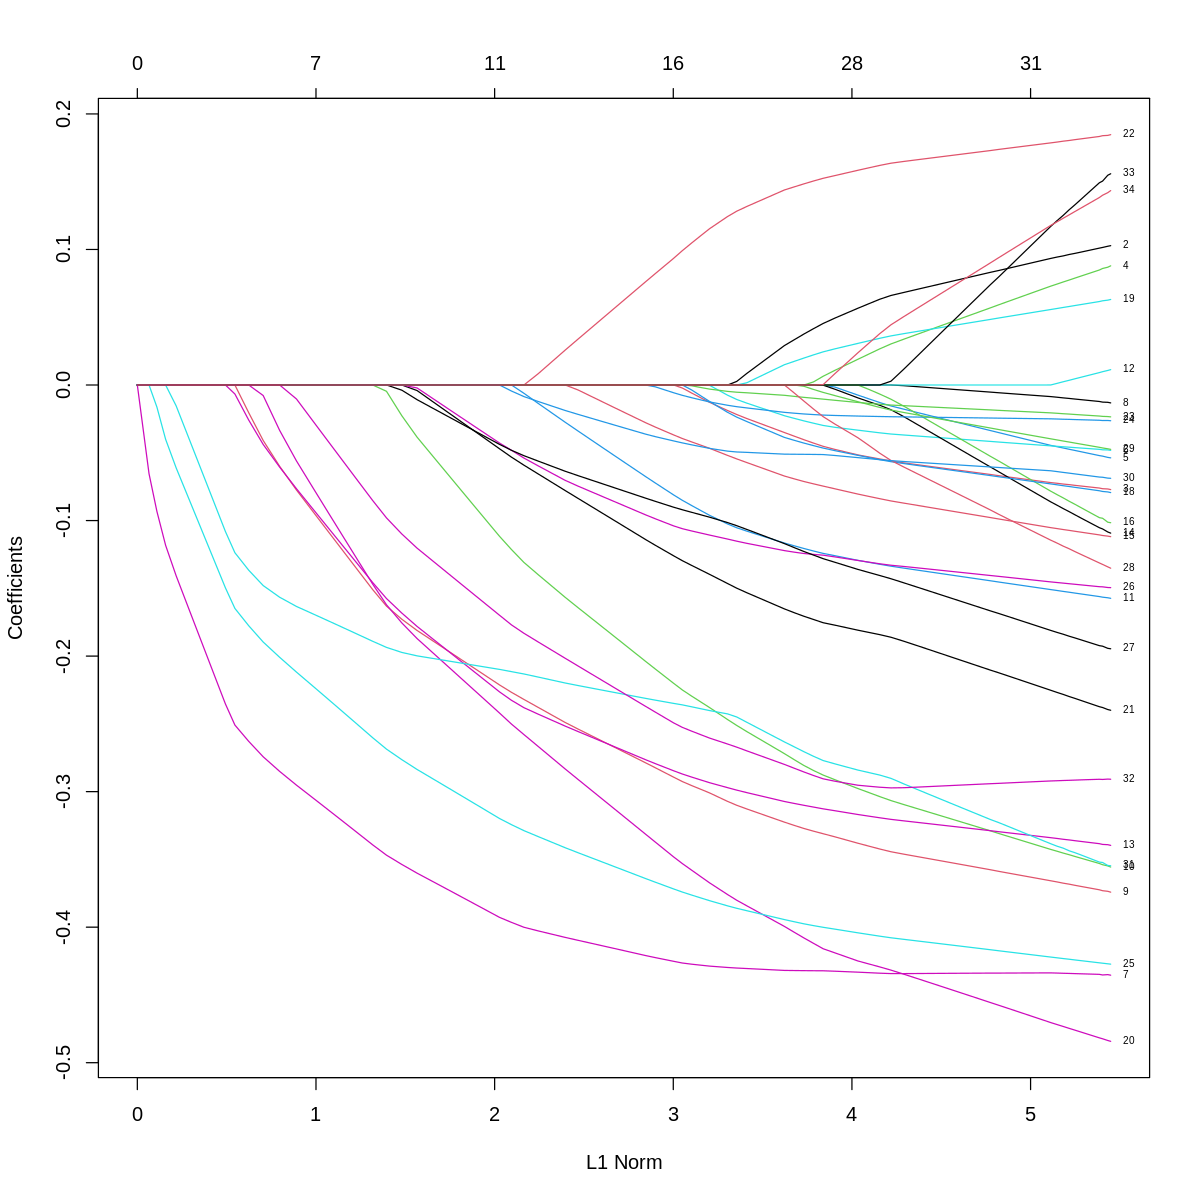

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)
plot(fit, label = TRUE)

Show 3 most important variables.

In [ ]:
cat("3 most important vars:\n")
dimnames(x)[2][[1]][c(7, 25, 31)]

3 most important vars:


[1] "AbusePhysOrEmoYearT" "AnyDepSympT"         "OrAnVagSexT"

## Run 3-Variable Model


In [ ]:
PQL30<-glmmPQL(AdhLastWeekNewT ~
              AbusePhysOrEmoYearT
              + AnyDepSympT
              + OrAnVagSexT,
              random = ~1|ID,family=family,data=df_comp)

summary(PQL30)

iteration 1

iteration 2

iteration 3

iteration 4

iteration 5



Linear mixed-effects model fit by maximum likelihood
  Data: df_comp 
  AIC BIC logLik
   NA  NA     NA

Random effects:
 Formula: ~1 | ID
        (Intercept)  Residual
StdDev:   0.8504954 0.9066939

Variance function:
 Structure: fixed weights
 Formula: ~invwt 
Fixed effects:  AdhLastWeekNewT ~ AbusePhysOrEmoYearT + AnyDepSympT + OrAnVagSexT 
                         Value  Std.Error   DF   t-value p-value
(Intercept)          1.4069886 0.07263096 1863 19.371746       0
AbusePhysOrEmoYearT -0.6444910 0.09061992 1863 -7.112024       0
AnyDepSympT         -0.4966980 0.08583579 1863 -5.786607       0
OrAnVagSexT         -0.4750369 0.09055330 1863 -5.245937       0
 Correlation: 
                    (Intr) APOEYT AnyDST
AbusePhysOrEmoYearT -0.315              
AnyDepSympT         -0.400 -0.107       
OrAnVagSexT         -0.464 -0.067 -0.070

Standardized Within-Group Residuals:
       Min         Q1        Med         Q3        Max 
-2.2715437 -0.9810270  0.5228545  0.6933127  1.5439286 
